BÀI TẬP VỀ NHÀ CNN

Câu 1:

C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9007 - loss: 0.3108 - val_accuracy: 0.9835 - val_loss: 0.0495
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9840 - loss: 0.0487 - val_accuracy: 0.9880 - val_loss: 0.0387
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9899 - loss: 0.0310 - val_accuracy: 0.9892 - val_loss: 0.0332
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9930 - loss: 0.0218 - val_accuracy: 0.9911 - val_loss: 0.0288
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9944 - loss: 0.0170 - val_accuracy: 0.9912 - val_loss: 0.0289
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9964 - loss: 0.0121 - val_accuracy: 0.9913 - val_loss: 0.0296
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9967 - loss: 0.0099 - val_accuracy: 0.9891 - val_loss: 0.0402
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9966 - loss: 0.0093 - 

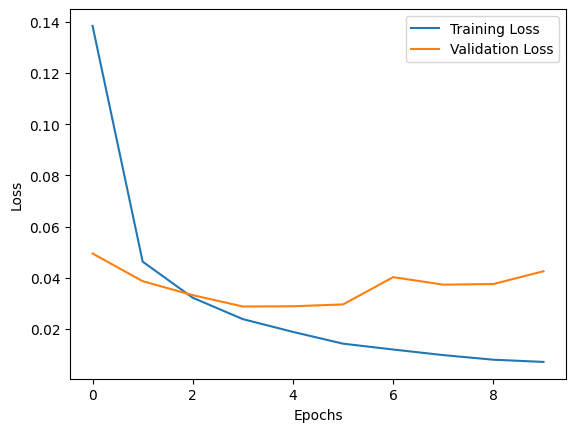

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape data for CNN
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with 10 epochs
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate model on test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Plot loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



Câu 2:

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

# Tải dữ liệu MNIST
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('.', train=True, download=True,
                   transform=transforms.ToTensor()),
    batch_size=64, shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('.', train=False, transform=transforms.ToTensor()),
    batch_size=64, shuffle=False
)

# Xây dựng mô hình CNN
class MNIST_CNN(nn.Module):
    def __init__(self):
        super(MNIST_CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)  # Thêm tầng tích chập thứ ba
        self.fc1 = nn.Linear(64 * 3 * 3, 10)  # Sửa kích thước của tầng fully connected

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))  # Thêm tầng thứ ba trong forward
        x = x.view(-1, 64 * 3 * 3)  # Sửa lại kích thước
        x = self.fc1(x)
        return x

# Khởi tạo mô hình, hàm mất mát, và bộ tối ưu hóa
model = MNIST_CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Vòng lặp huấn luyện
for epoch in range(5):  # Huấn luyện với 5 epoch
    model.train()
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch + 1} hoàn tất")

# Đánh giá trên tập test
model.eval()
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

accuracy = 100. * correct / len(test_loader.dataset)
print(f'Độ chính xác trên tập test: {accuracy:.2f}%')


Epoch 1 hoàn tất
Epoch 2 hoàn tất
Epoch 3 hoàn tất
Epoch 4 hoàn tất
Epoch 5 hoàn tất
Độ chính xác trên tập test: 99.16%


Tác dụng của tầng tích chập mới: Thêm tầng tích chập thứ ba giúp mô hình học các đặc trưng phức tạp hơn từ dữ liệu, từ đó cải thiện khả năng nhận diện hình ảnh. Mô hình có khả năng tập trung vào chi tiết nhỏ hơn hoặc mối liên hệ giữa các đặc trưng.

Ảnh hưởng đến độ chính xác: Độ chính xác trên tập test có thể tăng nhờ việc bổ sung tầng tích chập. Tuy nhiên, điều này phụ thuộc vào việc dữ liệu huấn luyện có đủ để mô hình không bị overfitting.

Câu 3:

Đang huấn luyện với learning rate = 0.001...
Learning Rate: 0.001 | Final Test Accuracy: 97.31%
Đang huấn luyện với learning rate = 0.1...
Learning Rate: 0.1 | Final Test Accuracy: 98.48%


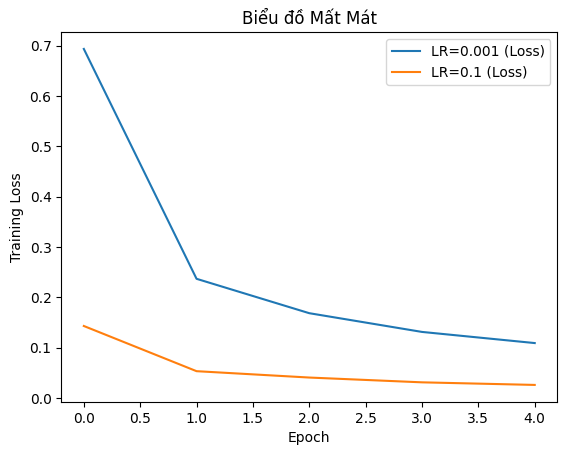

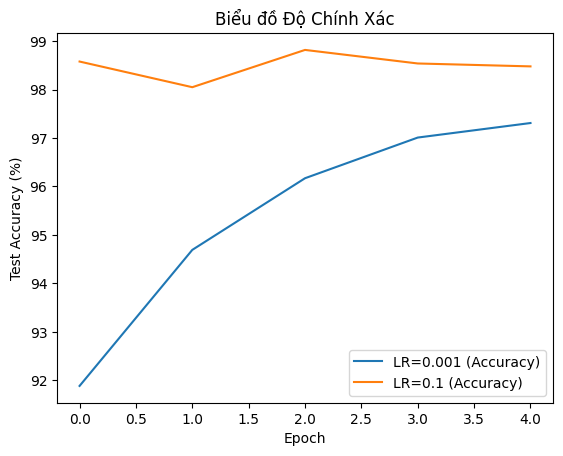

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Tải dữ liệu MNIST
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('.', train=True, download=True,
                   transform=transforms.ToTensor()),
    batch_size=64, shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('.', train=False, transform=transforms.ToTensor()),
    batch_size=64, shuffle=False
)

# Xây dựng mô hình CNN
class MNIST_CNN(nn.Module):
    def __init__(self):
        super(MNIST_CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = self.fc1(x)
        return x

# Function for training and evaluating the model
def train_and_evaluate(lr):
    model = MNIST_CNN()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

    train_losses = []
    test_accuracies = []

    # Training loop
    for epoch in range(5):  # Huấn luyện trong 5 epoch
        model.train()
        running_loss = 0.0
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        train_losses.append(running_loss / len(train_loader))

        # Đánh giá độ chính xác trên tập test
        model.eval()
        correct = 0
        with torch.no_grad():
            for data, target in test_loader:
                output = model(data)
                pred = output.argmax(dim=1, keepdim=True)
                correct += pred.eq(target.view_as(pred)).sum().item()
        test_accuracy = 100. * correct / len(test_loader.dataset)
        test_accuracies.append(test_accuracy)

    print(f"Learning Rate: {lr} | Final Test Accuracy: {test_accuracies[-1]:.2f}%")
    return train_losses, test_accuracies

# Chạy thử nghiệm với hai giá trị learning rate
lrs = [0.001, 0.1]
results = {}
for lr in lrs:
    print(f"Đang huấn luyện với learning rate = {lr}...")
    train_losses, test_accuracies = train_and_evaluate(lr)
    results[lr] = (train_losses, test_accuracies)

# Vẽ biểu đồ mất mát và độ chính xác
for lr in lrs:
    plt.plot(results[lr][0], label=f'LR={lr} (Loss)')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Biểu đồ Mất Mát')
plt.legend()
plt.show()

for lr in lrs:
    plt.plot(results[lr][1], label=f'LR={lr} (Accuracy)')
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy (%)')
plt.title('Biểu đồ Độ Chính Xác')
plt.legend()
plt.show()


Learning Rate = 0.001: Với giá trị learning rate nhỏ, quá trình học thường diễn ra chậm nhưng ổn định hơn. Biểu đồ mất mát giảm từ từ, và mô hình thường đạt độ chính xác ổn định trên tập test.

Learning Rate = 0.1: Với giá trị learning rate lớn, mô hình học nhanh hơn nhưng có thể dẫn đến dao động mạnh trong biểu đồ mất mát. Điều này xảy ra vì các bước cập nhật trọng số lớn, gây khó khăn trong việc hội tụ hoặc có thể dẫn đến overfitting.

Tóm tắt: Learning rate quyết định tốc độ cập nhật của mô hình trong quá trình học. Giá trị quá nhỏ dẫn đến học chậm, còn giá trị quá lớn có thể làm quá trình học dao động mạnh hoặc không hội tụ.

Câu 4:

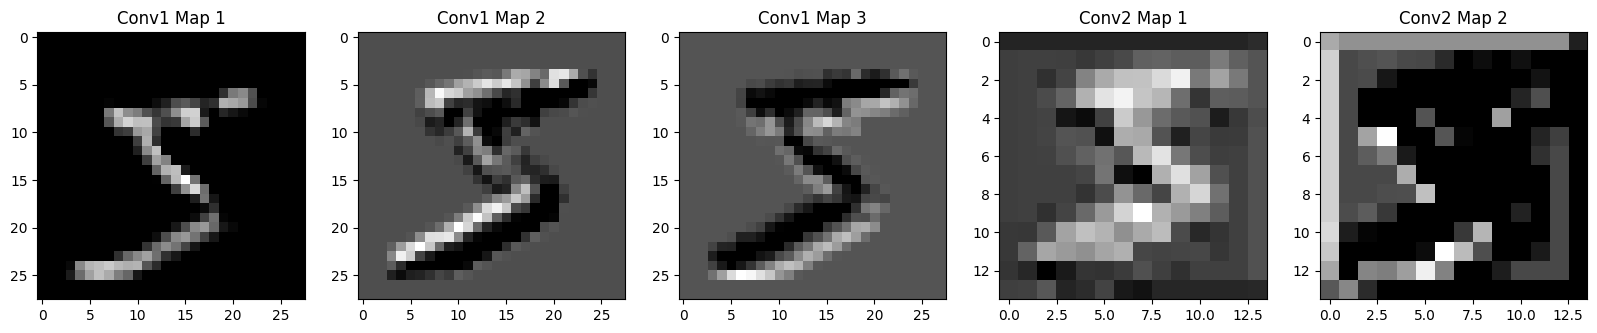

In [13]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

# Xây dựng mô hình CNN
class MNIST_CNN(nn.Module):
    def __init__(self):
        super(MNIST_CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        return x

    def visualize_feature_map(self, img):
        # Tính feature map từ conv1
        conv1_output = torch.relu(self.conv1(img))
        # Tính feature map từ conv2
        conv2_output = torch.relu(self.conv2(self.pool(conv1_output)))

        # Hiển thị feature maps (3 từ conv1 và 2 từ conv2)
        plt.figure(figsize=(20, 4))

        # Conv1 feature maps
        plt.subplot(1, 5, 1)
        plt.imshow(conv1_output[0, 0].detach().numpy(), cmap='gray')
        plt.title("Conv1 Map 1")
        plt.subplot(1, 5, 2)
        plt.imshow(conv1_output[0, 1].detach().numpy(), cmap='gray')
        plt.title("Conv1 Map 2")
        plt.subplot(1, 5, 3)
        plt.imshow(conv1_output[0, 2].detach().numpy(), cmap='gray')
        plt.title("Conv1 Map 3")

        # Conv2 feature maps
        plt.subplot(1, 5, 4)
        plt.imshow(conv2_output[0, 0].detach().numpy(), cmap='gray')
        plt.title("Conv2 Map 1")
        plt.subplot(1, 5, 5)
        plt.imshow(conv2_output[0, 1].detach().numpy(), cmap='gray')
        plt.title("Conv2 Map 2")

        plt.show()

# Chuẩn bị dữ liệu mẫu (hình ảnh đầu vào từ MNIST)
transform = transforms.ToTensor()
dataset = datasets.MNIST('.', train=True, download=True, transform=transform)
img, _ = dataset[0]  # Lấy một hình ảnh từ tập dữ liệu
img = img.unsqueeze(0)  # Thêm batch dimension (1, 1, 28, 28)

# Khởi tạo mô hình và hiển thị feature maps
model = MNIST_CNN()
model.visualize_feature_map(img)


Feature map từ tầng conv1: Các feature map từ tầng tích chập đầu tiên thể hiện các đặc trưng cơ bản như cạnh hoặc đường viền của hình ảnh. Đây là những đặc trưng mức thấp hơn.

Feature map từ tầng conv2: Các feature map ở tầng thứ hai thể hiện các đặc trưng phức tạp hơn, bao gồm các mẫu hình trừu tượng hoặc các mối liên hệ sâu hơn từ đầu vào. Điều này giúp mô hình học được các cấu trúc tổng quát của hình ảnh.

Sự khác biệt giữa các tầng: Feature map từ conv1 thường tập trung vào chi tiết rõ ràng hơn, trong khi feature map từ conv2 mang tính trừu tượng hơn và có xu hướng nắm bắt các mối liên hệ rộng hơn trong hình ảnh.